<H1> Notebook to verify the calculations of our simulator </H1>

## Importing required libraries

In [1]:
# importaing standard libraries
import zipfile
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.signal import freqs,periodogram,cheby1
import numpy as np

In [2]:
# import quantum libraries
import qutip

from qmldataset import run_default_experiment

2021-09-12 21:59:00.299444: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


## Create a set of data
The package uses numerical libraries to simulate the quantum system, the control and noise signals (of predefined types). By default, the `1-qubit` and `2-qubit` experiments supported are
    - '1q_X'
    - '1q_X_N1Z'
    - '1q_X_N2Z'
    - '1q_X_N3Z'
    - '1q_X_N4Z'
    - '1q_XY'
    - '1q_XY_N1X_N5Z'
    - '1q_XY_N1X_N6Z'
    - '1q_XY_N3X_N6Z'
    - '2q_IX_XI_XX'
    - '2q_IX_XI_XX_N1N5IZ_N1N5ZI'
    - '2q_IX_XI_XX_N1N6IZ_N1N6ZI'
    - '2q_IX_XI_N1N6IZ_N1N6ZI'


For each of the experiments, we can also use either `"Gaussian"` or `"Square"` pulse shapes.

Each experiment will create 2 zip files containing the result of the experiment.

For example, the experiment `1q_X_N4Z` with `Square` pulse shape will create the following file:

`S_1q_X_N4Z.zip`
`S_1q_X_N4Z_distortion.zip`

In this notebook, we will create a 1-qubit experiment 

In [3]:
experiment = '1q_X_N4Z'

num_examples = 100 # other options, 10000
batch_size = 5     # other options, 50
output_location = "/home/rchakrav/progs/qmldataset_result/"
pulse_shape = "Square"

run_default_experiment(
    experiment_config=experiment,
    pulse_shape=pulse_shape,
    num_examples=num_examples,
    batch_size=batch_size,
    output_location=output_location
)

2021-09-12 21:59:07.171072: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-12 21:59:07.180423: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-12 21:59:07.259366: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-12 21:59:07.260300: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0e:00.0 name: GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.43GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.43GiB/s
2021-09-12 21:59:07.260391: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-12 21:59:07.267015: I tensorflow/stream_executor/platform/default/

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
signal_generator (SignalGenerat ((None, 5, 3), (None 0           input_1[0][0]                    
__________________________________________________________________________________________________
H0 (HamiltonianConstruction)    (None, 1024, 1, 2, 2 0           signal_generator[0][1]           
__________________________________________________________________________________________________
noise_layer (NoiseLayer)        (None, 1024, 2000, 1 0           input_1[0][0]                    
______________________________________________________________________________________________

2021-09-12 21:59:11.592399: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-12 21:59:11.611416: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3094190000 Hz
2021-09-12 21:59:17.013636: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-12 21:59:17.392729: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-12 21:59:17.423805: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2021-09-12 21:59:20.055971: I tensorflow/core/util/cuda_solvers.cc:180] Creating CudaSolver handles for stream 0x56422427eae0
2021-09-12 21:59:20.056165: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcusolver.so.10
2021-09-12 21:59:20.3918

1/1 [==============================] - 12s 12s/step
Analyzing results

Measurement are:
[[-0.92611724  0.09989903 -0.0844595   0.9261034  -0.09996022  0.084484
  -0.08704103  0.06238262  0.93502647  0.08702677 -0.06244401 -0.9350027
   0.13047263  0.96929204 -0.08485017 -0.13048692 -0.96935207  0.08487457]]
The Vo operators are:
[array([[[ 0.9006459 -1.0976590e-01j,  0.24304444+1.6509474e-11j],
        [-0.24305457+1.5143041e-12j,  0.9006459 +1.0976591e-01j]]],
      dtype=complex64), array([[[ 9.5167768e-01-0.18078612j, -1.3184365e-10+0.12289004j],
        [ 2.3645785e-10+0.1228471j ,  9.5167774e-01+0.18078612j]]],
      dtype=complex64), array([[[ 0.9006455 +2.8850665e-11j,  0.20421636+1.8905815e-01j],
        [-0.20421636+1.8905815e-01j,  0.90062857-2.4434559e-11j]]],
      dtype=complex64)]
The distance measures are:
[0.2845974934948491, 0.22388605014423074, 0.29550856150922317]
Model: "model_1"
_______________________________________________________________________________________

1/1 [==============================] - ETA: 0s

2021-09-12 21:59:51.347253: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 327680000 exceeds 10% of free system memory.


1/1 [==============================] - 26s 26s/step


2021-09-12 21:59:52.180155: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 327680000 exceeds 10% of free system memory.


Simulating and storing batch 1

1/1 [==============================] - ETA: 0s

2021-09-12 22:00:19.369424: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 327680000 exceeds 10% of free system memory.


1/1 [==============================] - 11s 11s/step


2021-09-12 22:00:20.107619: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 327680000 exceeds 10% of free system memory.


Simulating and storing batch 2

1/1 [==============================] - ETA: 0s

2021-09-12 22:00:47.286160: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 327680000 exceeds 10% of free system memory.


1/1 [==============================] - 11s 11s/step
Simulating and storing batch 3

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 4

1/1 [==============================] - 11s 11s/step
Simulating and storing batch 5

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 6

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 7

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 8

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 9

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 10

1/1 [==============================] - 11s 11s/step
Simulating and storing batch 11

1/1 [==============================] - 11s 11s/step
Simulating and storing batch 12

1/1 [==============================] - 11s 11s/step
Simulating and storing batch 13

1/1 [==============================] - 10s 10s/step
Simulating and stori

1/1 [==============================] - 24s 24s/step
Simulating and storing batch 1

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 2

1/1 [==============================] - 11s 11s/step
Simulating and storing batch 3

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 4

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 5

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 6

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 7

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 8

1/1 [==============================] - 11s 11s/step
Simulating and storing batch 9

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 10

1/1 [==============================] - 10s 10s/step
Simulating and storing batch 11

1/1 [==============================] - 10s 10s/step
Simulating and storing

## Once saved, let us read the experiment outcome

In [6]:
# verification parameters
dataset = "/home/rchakrav/progs/qmldataset_result/S_1q_X_N4Z_distortion.zip"
ex_num  = 1

In [11]:
fname = "home/rchakrav/progs/qmldataset_result/1q_X_N4Z_ex_0"

# unzip the dataset zipfile and extract the example file
fzip  = zipfile.ZipFile(dataset, mode='r')
fzip.extract( fname )
fzip.close()

# load the example file
f     = open(fname,  "rb")
data  = pickle.load(f)
f.close()
os.remove(fname)

[[[ 37.095715     0.11742578   0.1       ]
  [-64.40186      0.27051598   0.1       ]
  [ 51.745724     0.42237598   0.1       ]
  [ 44.597267     0.5925079    0.1       ]
  [-88.050224     0.74601114   0.1       ]]]


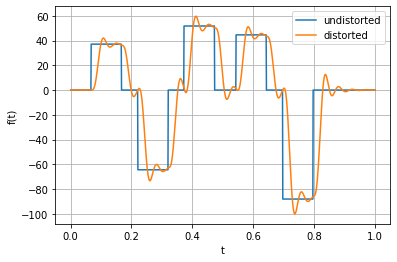

In [12]:
# plot the pulse
plt.figure()
num_controls = len(data["sim_parameters"]["dynamic_operators"])
for idx in range(num_controls):
    plt.subplot(num_controls , 1, idx+1 )
    plt.plot(data["time_range"], data["pulses"][0,:,0,idx], label="undistorted")
    plt.plot(data["time_range"], data["distorted_pulses"][0,:,0,idx], label="distorted")
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend()
print(data["pulse_parameters"])

## Display the distortion if exists

In [ ]:
# display distortion filter if exists
distortion = cheby1(4,0.1,2*np.pi*20, analog=True)
# evaluate frequency response of the filter
w, Hw = freqs(distortion[0], distortion[1])
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.semilogx(w, 20*np.log(np.abs(Hw)))
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H(\Omega)|$')
plt.grid()
plt.subplot(1,2,2)
plt.semilogx(w, np.angle(Hw))
plt.xlabel(r'$\Omega$')
plt.ylabel(r'arg $H(\Omega)$')
plt.grid()

## Display the noise

In [16]:
# display noise if exists
for idx_profile,profile in enumerate(data["sim_parameters"]["noise_profile"]): 
    if profile in [2,3,4] or (profile==6 and p==0): 
        # estimate the correlation matrix of the noise
        correlation = 0
        for k in range(data["sim_parameters"]["num_realizations"]):
            correlation = correlation + data["noise"][0,:,k:k+1,idx_profile]@data["noise"][0,:,k:k+1,idx_profile].T
        correlation = correlation/data["sim_parameters"]["num_realizations"]
        # plot correlation matrix
        plt.figure()
        plt.matshow(correlation,0)
        plt.colorbar()
        p = 0
    elif profile in [1,5]:
        # estimate the PSD of the noise
        psd = 0
        for k in range(data["sim_parameters"]["num_realizations"]):
            f, Pxx = periodogram(data["noise"][0,:,k,idx_profile], data["sim_parameters"]["num_time_steps"]/data["sim_parameters"]["evolution_time"])            
            psd = psd + Pxx
        psd = psd/data["sim_parameters"]["num_realizations"]
        plt.figure()
        plt.plot(f[f>0], psd[1:])
        plt.xlabel('f')
        plt.ylabel('psd')
        plt.grid()
        p = 1

In [17]:
# load initial states, measurement operators, and control Hamilotonian
initial_states = [qutip.Qobj(state) for state in data["sim_parameters"]["initial_states"] ] 
measurements   = [qutip.Qobj(op) for op in data["sim_parameters"]["measurement_operators"] ]

H0  = [ [qutip.Qobj(op), np.ones((len(data["sim_parameters"]["time_range"])))] for op in data["sim_parameters"]["static_operators"] ] + [ [qutip.Qobj(op), data["distorted_pulses"][0,:,0,idx]] for idx, op in enumerate(data["sim_parameters"]["dynamic_operators"]) ]

expectations = np.zeros((1,data["sim_parameters"]["num_realizations"], len(initial_states)*len(measurements)))  
for idx_K in range(data["sim_parameters"]["num_realizations"]):    
    H1      = [ [qutip.Qobj(op), data["noise"][0,:,idx_K,idx]] for idx, op in enumerate(data["sim_parameters"]["noise_operators"]) ]
    results = [ qutip.mesolve(H0 + H1, rho, np.array(data["sim_parameters"]["time_range"]), e_ops=measurements).expect for rho in initial_states]     
    expectations [0,idx_K, :] = np.concatenate( [np.array( [results[idx_rho][idx_M][-1] for idx_M in range(len(measurements))]) for idx_rho in range(len(initial_states))])
    print(idx_K+1,  end="\r")

KeyError: 'time_range'

In [ ]:
# plot the average expectation over all noise realizations for every observable
plt.figure()
plt.plot(np.average(expectations, 1)[0], label="qutip")
plt.plot(data["expectations"][0], label = "tf")
plt.ylabel("Average observable value")
plt.xlabel("observable Index")
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend()
plt.grid()

In [ ]:
# plot all possible observables for a particular noise realization
idx_K = 2
plt.figure()
plt.plot(expectations[0,idx_K,:], label="qutip")
plt.plot(data["Eo"][0,idx_K,:],  label = "tf")
plt.ylabel("Observable Value for realization %d"%idx_K)
plt.xlabel("Observable Index")
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.legend()
plt.grid()

In [ ]:
# simulation time without I/O operations
print("Total time for 1 batch is %f seconds"%data["sim_parameters"]["elapsed_time"])
print("Average time for 1 example %f seconds"%(data["sim_parameters"]["elapsed_time"]/ data["sim_parameters"]["batch_size"]))